In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
df=pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [37]:
empty=df.isnull().sum()
empty

TV       0
Sales    0
dtype: int64

In [38]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [39]:
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(160, 1)

In [41]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [42]:
reg=LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [43]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scores=cross_val_score(reg, X, y, cv=kf, scoring='r2')

In [44]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test, y_pred)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)
print("R^2 value: ", score)


Mean Squared Error:  10.204654118800955
Mean Absolute Error:  2.444420003751042
Root Mean Squared Error:  3.194472431998898
R^2 value:  0.6766954295627077


In [45]:
print("Coefficient: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficient:  [3.91569271]
Intercept:  14.100000000000001


In [46]:
print("Cross-validation scores:", scores)
print("Average R^2 score:", np.mean(scores))


Cross-validation scores: [0.67669543 0.52667195 0.6882648  0.46819988 0.57084478]
Average R^2 score: 0.5861353674998562


Text(0, 0.5, 'Sales')

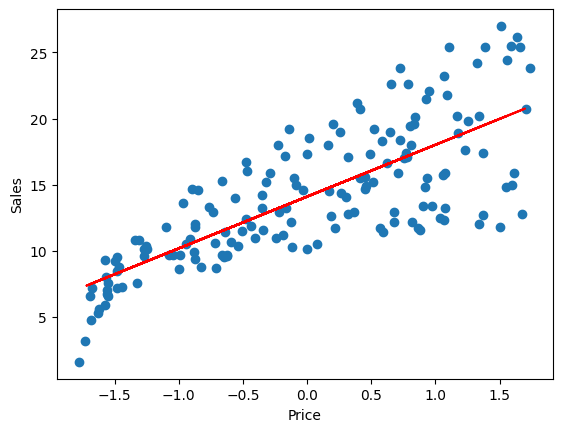

In [62]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='r')
plt.xlabel("Price")
plt.ylabel("Sales")